In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [295]:
import warnings
warnings.filterwarnings("ignore")

In [785]:
import scipy.stats as stats
from scipy.stats import norm

In [471]:
df = pd.read_csv("D:\kursi\dz_2\descriptive_stats\clients.csv")
df

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1022,1,2005,7,Apartment,22,743.09,"$ 210,745.17",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
191,1028,1,2005,7,Apartment,28,1160.36,"$ 331,154.88",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
192,1034,1,2005,7,Apartment,34,625.80,"$ 204,434.68",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
193,1037,1,2005,7,Apartment,37,756.21,"$ 189,194.31",Sold,C0174,...,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website


## Предварительный анализ данных:

In [472]:
#избавляемся от nan 
data = df.drop(df[df['Entity']=='Firm'].index)
data

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3040,3,2007,6,Apartment,40,670.89,"$ 204,292.49",Sold,C0103,...,1936.0,8.0,13.0,M,USA,Oregon,Investment,2,No,Website
174,1023,1,2005,4,Apartment,23,782.25,"$ 261,579.89",Sold,C0021,...,1932.0,6.0,13.0,F,Russia,NaN,Investment,3,No,Website
175,3009,3,2006,5,Apartment,9,743.41,"$ 222,867.42",Sold,C0148,...,1933.0,5.0,5.0,F,USA,California,Investment,5,Yes,Agency
176,3052,3,2006,3,Apartment,52,923.21,"$ 291,494.36",Sold,C0172,...,1933.0,6.0,8.0,M,USA,California,Home,4,Yes,Agency


In [473]:
data = data.fillna({'State':0})
#так как это не USA, штатов нет, значение поставим 0

In [474]:
#переименуем для удобности, избавясь от заглавных букв и пробелов
data = data.rename(columns=lambda i: i.lower().strip().replace(" ", "_"))\
.rename(columns={'y':'year', 'm':'month', 'd':'day', 'area_(ft.)': 'area(ft.)'})
data

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area(ft.),price,status,customer_id,...,year,month,day,gender,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3040,3,2007,6,Apartment,40,670.89,"$ 204,292.49",Sold,C0103,...,1936.0,8.0,13.0,M,USA,Oregon,Investment,2,No,Website
174,1023,1,2005,4,Apartment,23,782.25,"$ 261,579.89",Sold,C0021,...,1932.0,6.0,13.0,F,Russia,0,Investment,3,No,Website
175,3009,3,2006,5,Apartment,9,743.41,"$ 222,867.42",Sold,C0148,...,1933.0,5.0,5.0,F,USA,California,Investment,5,Yes,Agency
176,3052,3,2006,3,Apartment,52,923.21,"$ 291,494.36",Sold,C0172,...,1933.0,6.0,8.0,M,USA,California,Home,4,Yes,Agency


In [475]:
#посмотрим на типы данных
data.dtypes

id                           int64
building                     int64
year_of_sale                 int64
month_of_sale                int64
type_of_property            object
property_number              int64
area(ft.)                  float64
price                       object
status                      object
customer_id                 object
entity                      object
name                        object
surname                     object
age_at_time_of_purchase    float64
age_interval                object
year                       float64
month                      float64
day                        float64
gender                      object
country                     object
state                       object
purpose                     object
deal_satisfaction            int64
mortgage                    object
source                      object
dtype: object

In [476]:
#преобразуем значения столбца цены
data.price = data.price.apply(lambda x: x.replace('$', "").replace(",", ""))

In [477]:
#проверка уникальных значений
#data.year.unique()
#data.day.unique()
data.month.unique()

array([ 6.,  2., 12.,  5.,  8.,  9.,  1.,  3., 10.,  7.,  4., 11., 15.])

In [482]:
#убираем 15 месяц, который выявился в ходе проверки уникальных значений датафрейма, представим что опечатались, и это 3 месяц(15=12+3)140 строка
data.month.loc[data.month==15]=3

3

In [479]:
#поменяем типы данных
data = data.astype({'price': "float", 'year': "int",'day': "int", 'month': "int", 'age_at_time_of_purchase': "int"})
data["full_date"] = pd.to_datetime(data[['month', 'day', 'year']])

In [480]:
#Преобразуем колонки с булевыми значениями
data.gender = data.gender.map({"F":1, "M":0})
data.mortgage = data.mortgage.map({"Yes":1, "No":0})

## Приступаем к графическому анализу:

### посмотрим на распреление клиентов по полу:

In [ ]:
#данные подготовлены, приступаем к анализу
sns.set_style("darkgrid",{'axes.labelcolor':"k", 'axes.edgecolor':'k', 
'xtick.color':'k'})
sns.set_color_codes("muted")
gender_dis = sns.countplot(data.gender, x="gender",  palette=['r', 'g', 
'b'] );
gender_dis.set_title("gender distribution", fontsize=20);
gender_dis.set_xticklabels(['Men', 'Women']);

In [483]:
#альтернатива
data.gender.value_counts()

0    108
1     70
Name: gender, dtype: int64

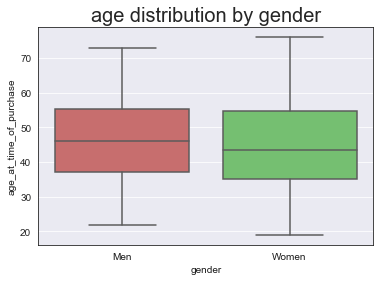

In [639]:
age_dis = sns.boxplot(x=data.gender, y=data.age_at_time_of_purchase, palette=['r', 'g', 
'b']);
age_dis.set_xticklabels(['Men', 'Women']);
age_dis.set_title("age distribution by gender", fontsize=20);

<Figure size 576x576 with 0 Axes>

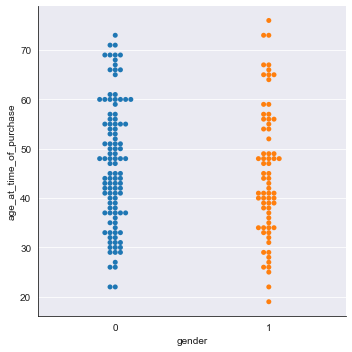

In [706]:
#или
plt.figure(figsize=(8, 8));
sns.catplot(x="gender", y="age_at_time_of_purchase", kind="swarm", data=data);

In [582]:
#неграфический анализ
data.groupby(data.gender, as_index = False)\
.agg({"age_at_time_of_purchase":"mean"}).round(1)

,gender,age_at_time_of_purchase
0,0,46.8
1,1,45.2


In [589]:
#среднее
data.groupby(data.gender, as_index = False)\
.agg({"age_at_time_of_purchase":"mean"}).round(1)

,gender,age_at_time_of_purchase
0,0,46.8
1,1,45.2


In [592]:
#медиана значений
data.groupby(data.gender, as_index = False).median()[["age_at_time_of_purchase"]]

,age_at_time_of_purchase
0,46.0
1,43.5


In [595]:
#стандартное отклонение
data.groupby(data.gender, as_index = False).std()[["age_at_time_of_purchase"]].round(2)

,age_at_time_of_purchase
0,12.57
1,13.28


In [797]:
#доверительный интервал 95% для возраста клиента:
se = np.std( data['age_at_time_of_purchase'] ) / np.sqrt( len(data['age_at_time_of_purchase']) )
confidenceCoef = stats.norm.interval( 0.95 )[1]
(np.mean( data['age_at_time_of_purchase'] ) - confidenceCoef * se, np.mean( data['age_at_time_of_purchase'] ) + confidenceCoef * se )

(44.27047665892852, 48.03289412758833)

### Посмотрим на данные Contry

In [515]:
data.country.value_counts()
#несостыковка с USA, надо разобраться почему

USA        157
Canada       7
Russia       4
USA          3
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: country, dtype: int64

In [517]:
data.country.unique()
#потому что в некоторых значениях неудален пробел

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

In [519]:
#посмотрим, сколько таких значений
data[data.country=="USA "]

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area(ft.),price,status,customer_id,...,month,day,gender,country,state,purpose,deal_satisfaction,mortgage,source,full_date
40,4005,4,2007,11,Apartment,5,1121.95,344530.89,Sold,C0142,...,5,7,1,USA,California,Home,5,0,Website,1972-05-07
46,4006,4,2006,7,Apartment,6,733.19,222138.72,Sold,C0150,...,6,5,0,USA,California,Home,3,0,Website,1969-06-05
118,2057,2,2006,9,Apartment,57,1396.86,382277.15,Sold,C0044,...,9,29,0,USA,California,Home,4,0,Agency,1954-09-29


In [523]:
#удалим
data.country= data.country.apply(lambda x: x.strip())
data.country.unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada'], dtype=object)

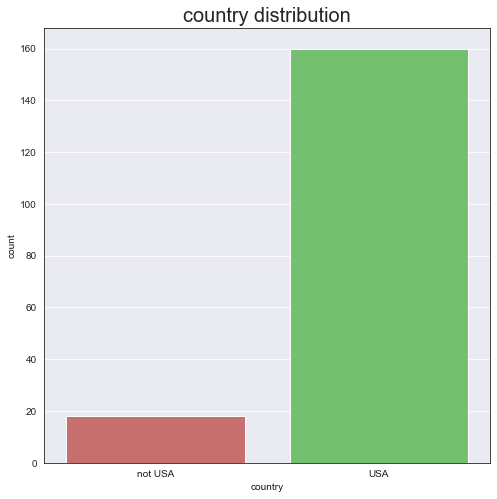

In [634]:
#посмотрим, сколько клиентов из США
plt.figure(figsize=(8, 8))
country_dis = sns.countplot(data.country=="USA",  palette=['r', 'g', 
'b'] );
country_dis.set_title("country distribution");
country_dis.set_xticklabels(['not USA', "USA"]);
country_dis.set_title("country distribution", fontsize=20);

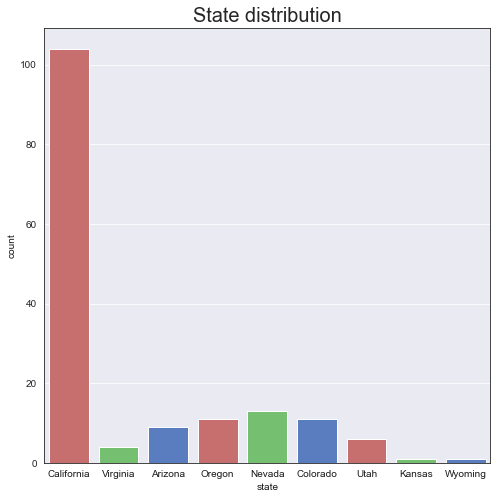

In [644]:
#какой штат превосходит по численности
plt.figure(figsize=(8, 8))
country_dis2 = sns.countplot(data[data.country=="USA"]["state"],  palette=['r', 'g', 
'b'] );
country_dis2.set_title("State distribution", fontsize=20);

### Распределение сделок в зависимости от года и месяца

In [550]:
#посмотрим, какой год оказался максимально продуктивным на продажи
data.year_of_sale.value_counts()

2007    102
2006     39
2005     15
2004     12
2008      9
2010      1
Name: year_of_sale, dtype: int64

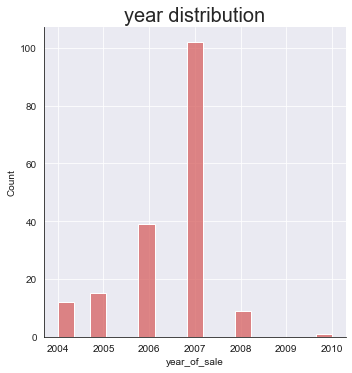

In [569]:
year_dis = sns.displot(data.year_of_sale, color='r', kde=False)
plt.title("year distribution", fontsize=20);

In [563]:
#посмотрим, какой месяц самый продуктивный на продажи
data.month_of_sale.value_counts()

11    25
3     22
10    18
12    18
8     18
6     15
9     14
4     13
5     11
7      8
1      8
2      8
Name: month_of_sale, dtype: int64

<Figure size 576x576 with 0 Axes>

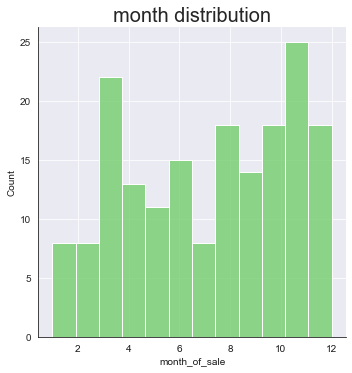

In [633]:
plt.figure(figsize=(8, 8));
month_dis = sns.displot(data.month_of_sale, color='g', kde=False,  bins=12);
plt.title("month distribution", fontsize=20);

### Анализ цен на недвижимость

In [800]:
#анализ цен
data.price.describe()

count       178.000000
mean     270965.425730
std       78525.152444
min      153466.710000
25%      214826.330000
50%      245196.730000
75%      309387.082500
max      503790.230000
Name: price, dtype: float64

In [792]:
#доверительный интервал 95%:
se = np.std( data['price'] ) / np.sqrt( len(data['price']))
confidenceCoef = stats.norm.interval( 0.95 )[1]
(np.mean( data['price'] ) - confidenceCoef * se, np.mean( data['price'] ) + confidenceCoef * se )

(259462.09754862296, 282468.75391205156)

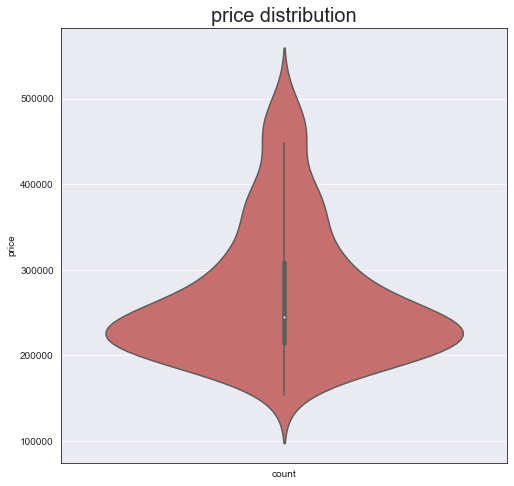

In [641]:
plt.figure(figsize=(8, 8))
price_dis = sns.violinplot(y="price", data=data, color='r');
plt.title("price distribution", fontsize=20);
price_dis.set_xticklabels(["count"]);

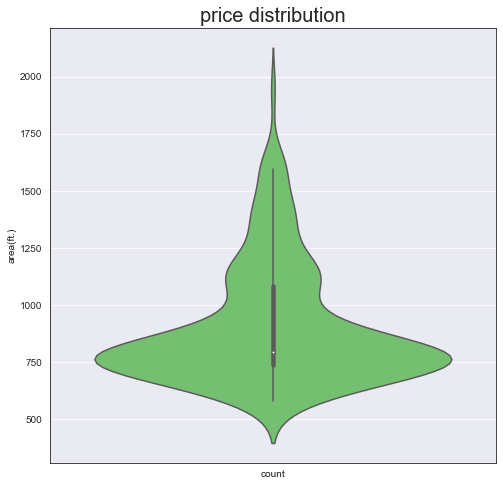

In [640]:
plt.figure(figsize=(8, 8))
price_dis = sns.violinplot(y="area(ft.)", data=data, color='g');
plt.title("price distribution", fontsize=20);
price_dis.set_xticklabels(["count"]);

In [796]:
#доверительный интервал 95%:
se = np.std( data['area(ft.)'] ) / np.sqrt( len(data['area(ft.)']))
confidenceCoef = stats.norm.interval( 0.95 )[1]
(np.mean( data['area(ft.)'] ) - confidenceCoef * se, np.mean( data['area(ft.)'] ) + confidenceCoef * se )


(867.0107776876068, 943.0064133236297)

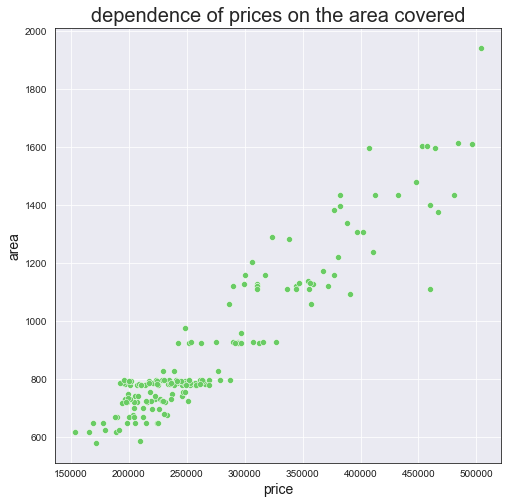

In [631]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='price', y='area(ft.)', data=data, color='g');
plt.xlabel("price", fontsize=14);
plt.ylabel("area", fontsize=14);
plt.title("dependence of prices on the area covered", fontsize=20);

In [627]:
#корреляция
data[["area(ft.)", 'price']].corr()

,area(ft.),price
area(ft.),1.000000,0.938883
price,0.938883,1.000000


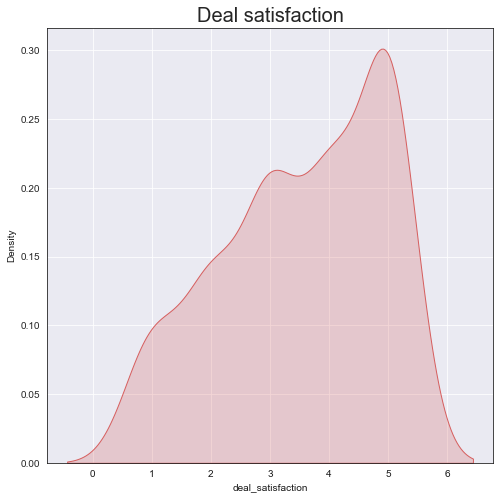

In [754]:
#насколько клиенты удовлетворены сделкой
plt.figure(figsize=(8, 8))
year_dis = sns.kdeplot(data.deal_satisfaction, color='r', shade = True)
plt.title("Deal satisfaction", fontsize=20);

In [799]:
data.deal_satisfaction.value_counts()

5    59
3    38
4    38
2    25
1    18
Name: deal_satisfaction, dtype: int64

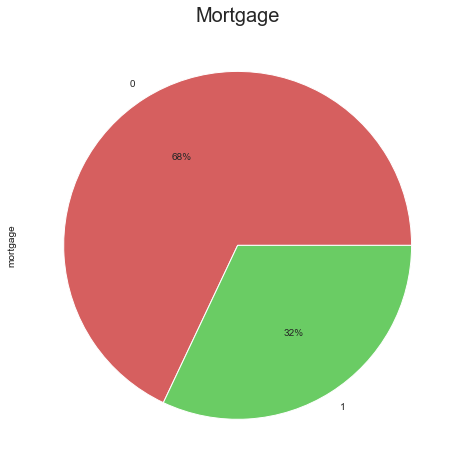

In [701]:
plt.figure(figsize=(8, 8))
data.mortgage.value_counts().plot(kind="pie", autopct="%1.0f%%", colors = ["r", "g"]);
plt.title("Mortgage", fontsize=20);
#только в 32% случаях клиентыпользовались ипотекой

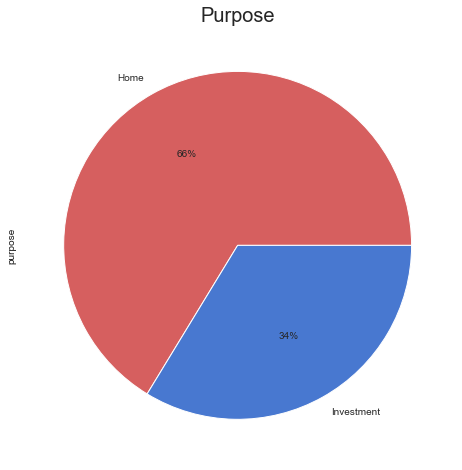

In [724]:
plt.figure(figsize=(8, 8))
data.purpose.value_counts().plot(kind="pie", autopct="%1.0f%%", colors = ["r", "b"]);
plt.title("Purpose", fontsize=20);
#только в 32% случаях клиентыпользовались ипотекой

In [716]:
data.groupby("purpose", as_index=False).aggregate({"mortgage":'count'})
# в большинстве клиент искал недвижимость для личного пользования

,purpose,mortgage
0,Home,118
1,Investment,60


In [725]:
#исходя из 2 вышеприведенных диаграмм, сложилось впечатление,что возможно для инвестирования люди и использовали ипотеку. Проверим:
pd.crosstab(data.purpose, data.mortgage)
#нет, в основном кредит брали для приобретения собственной жилплощади

mortgage,0,1
purpose,,
Home,72,46
Investment,49,11


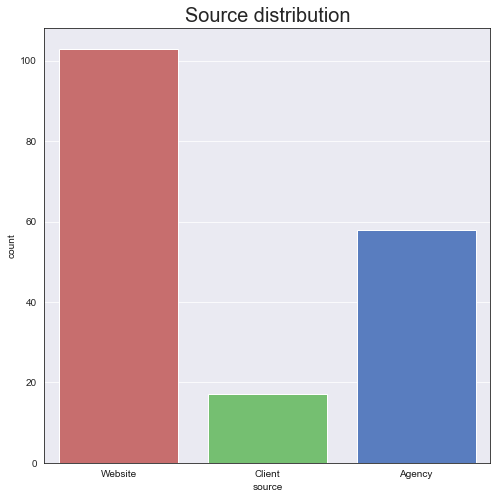

In [723]:
plt.figure(figsize=(8, 8))
source_dis = sns.countplot(data.source,  palette=['r', 'g', 
'b'] );
source_dis.set_title("Source distribution", fontsize=20);
#большинтсво клиентов нашли предложение через вебсайт

# Вывод

   #### Приблизительный портрет клиента: Мужчина среднего возраста 44-48 лет  , из США штата Калифорния, который в среднем тратит на сделку 260.000-282.000 $  и ищет недвижимость для личного пользования площадью 867-943 фута , редко пользуется ипотекой, находит недвижимость через вебсайт, и в основном доволен пройденой сделкой. Наиболее частоиспользуемый месяц для продажи - ноябрь. Максимальный год по продажам: 2007.